# Problem Definition
When competing in Kaggle competitions, there is varying importance of choosing which features to include and which to drop. The original goal of this project was to determine which external data sets would be crucial in augmenting Zillow Housing price predictions, but unfortunately due to the size of the data set ~3m parcels, that wasn't explored. As a result of this, the primary challenge was determining which features to keep, which algorithms provided strong predictions and what finessing increased the predictive/explanatory power of the models.

Kaggle Competition: https://www.kaggle.com/c/zillow-prize-1
The Kaggle competition was to make predictions on the logerror of sales per parcel of sales made in Sept-December 2016. This involved making predictions of the logerror of 6 time periods and wasn't the original competition challenge. 

This analysis:
Because I was looking to learn about the real estate market and less about the errors implicit in the Zillow Zestimate, I pivoted the analysis to be on the most recent value of each parcel (included in the data set).

# Data
Zillow House Value competition - Los Angeles, Orange and Ventura, California) in 2016. 
Data Dictionary: https://www.kaggle.com/c/zillow-prize-1/download/zillow_data_dictionary.xlsx.zip 
This data has the standard features you would expect:
Rooms, building type, age, amenities (pool/deck)
Interesting features: tax assessment for 2015, tax delinquency, and FIPS code
The FIPS or Zip code wil be the primary key for joining with census data or other granular demographic data that could be added for feature engineering

Variable | Description
---| ---|
*airconditioningtypeid* |  Type of cooling system present in the home (if any)
*architecturalstyletypeid* |  Architectural style of the home (i.e. ranch, colonial, split-level, etc…)
*basementsqft* |  Finished living area below or partially below ground level
*bathroomcnt* |  Number of bathrooms in home including fractional bathrooms
*bedroomcnt* |  Number of bedrooms in home 
*buildingqualitytypeid* |  Overall assessment of condition of the building from best (lowest) to worst (highest)
*buildingclasstypeid* | The building framing type (steel frame, wood frame, concrete/brick) 
*calculatedbathnbr* |  Number of bathrooms in home including fractional bathroom
*decktypeid* | Type of deck (if any) present on parcel
*threequarterbathnbr* |  Number of 3/4 bathrooms in house (shower + sink + toilet)
*finishedfloor1squarefeet* |  Size of the finished living area on the first (entry) floor of the home
*calculatedfinishedsquarefeet* |  Calculated total finished living area of the home 
*finishedsquarefeet6* | Base unfinished and finished area
*finishedsquarefeet12* | Finished living area
*finishedsquarefeet13* | Perimeter  living area
*finishedsquarefeet15* | Total area
*finishedsquarefeet50* |  Size of the finished living area on the first (entry) floor of the home
*fips* |  Federal Information Processing Standard code -  see https://en.wikipedia.org/wiki/FIPS_county_code for more details
*fireplacecnt* |  Number of fireplaces in a home (if any)
*fireplaceflag* |  Is a fireplace present in this home 
*fullbathcnt* |  Number of full bathrooms (sink, shower + bathtub, and toilet) present in home
*garagecarcnt* |  Total number of garages on the lot including an attached garage
*garagetotalsqft* |  Total number of square feet of all garages on lot including an attached garage
*hashottuborspa* |  Does the home have a hot tub or spa
*heatingorsystemtypeid* |  Type of home heating system
*latitude* |  Latitude of the middle of the parcel multiplied by 10e6
*longitude* |  Longitude of the middle of the parcel multiplied by 10e6
*lotsizesquarefeet* |  Area of the lot in square feet
*numberofstories* |  Number of stories or levels the home has
*parcelid* |  Unique identifier for parcels (lots) 
*poolcnt* |  Number of pools on the lot (if any)
*poolsizesum* |  Total square footage of all pools on property
*pooltypeid10* |  Spa or Hot Tub
*pooltypeid2* |  Pool with Spa/Hot Tub
*pooltypeid7* |  Pool without hot tub
*propertycountylandusecode* |  County land use code i.e. it's zoning at the county level
*propertylandusetypeid* |  Type of land use the property is zoned for
*propertyzoningdesc* |  Description of the allowed land uses (zoning) for that property
*rawcensustractandblock* |  Census tract and block ID combined - also contains blockgroup assignment by extension
*censustractandblock* |  Census tract and block ID combined - also contains blockgroup assignment by extension
*regionidcounty* | County in which the property is located
*regionidcity* |  City in which the property is located (if any)
*regionidzip* |  Zip code in which the property is located
*regionidneighborhood* | Neighborhood in which the property is located
*roomcnt* |  Total number of rooms in the principal residence
*storytypeid* |  Type of floors in a multi-story house (i.e. basement and main level, split-level, attic, etc.).  See tab for details.
*typeconstructiontypeid* |  What type of construction material was used to construct the home
*unitcnt* |  Number of units the structure is built into (i.e. 2 = duplex, 3 = triplex, etc...)
*yardbuildingsqft17* | Patio in  yard
*yardbuildingsqft26* | Storage shed/building in yard
*yearbuilt* |  The Year the principal residence was built 
*taxvaluedollarcnt* | The total tax assessed value of the parcel
*structuretaxvaluedollarcnt* | The assessed value of the built structure on the parcel
*landtaxvaluedollarcnt* | The assessed value of the land area of the parcel
*taxamount* | The total property tax assessed for that assessment year
*assessmentyear* | The year of the property tax assessment 
*taxdelinquencyflag* | Property taxes for this parcel are past due as of 2015

In [1]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
% precision 2
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
#data importing
propertiesorig = pd.read_csv("../data/properties_2016.csv")

/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
propertiesorig.describe()
#very obvious due to the nature of some of these ids that some are discrete

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,2.985217e+06,811519.000000,6061.000000,1628.000000,2.973755e+06,2.973767e+06,12629.000000,1.938488e+06,2.856305e+06,17096.0,...,2647.000000,2.925289e+06,682069.000000,2.930235e+06,2.942667e+06,2.973778e+06,2.917484e+06,2.953967e+06,56464.000000,2.910091e+06
mean,1.332586e+07,1.931166,7.202607,646.883292,2.209143e+00,3.088949e+00,3.725948,5.784787e+00,2.299263e+00,66.0,...,278.296562,1.964262e+03,1.401464,1.708836e+05,4.204790e+05,2.014999e+03,2.524780e+05,5.377607e+03,13.892409,6.048431e+13
std,7.909966e+06,3.148587,2.436290,538.793473,1.077754e+00,1.275859e+00,0.501700,1.805352e+00,1.000736e+00,0.0,...,369.731508,2.344132e+01,0.539076,4.020683e+05,7.263467e+05,3.683161e-02,4.450132e+05,9.183107e+03,2.581006,3.249035e+11
min,1.071172e+07,1.000000,2.000000,20.000000,0.000000e+00,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,66.0,...,10.000000,1.801000e+03,1.000000,1.000000e+00,1.000000e+00,2.000000e+03,1.000000e+00,1.340000e+00,0.000000,-1.000000e+00
25%,1.164371e+07,1.000000,7.000000,272.000000,2.000000e+00,2.000000e+00,3.000000,4.000000e+00,2.000000e+00,66.0,...,96.000000,1.950000e+03,1.000000,7.480000e+04,1.796750e+05,2.015000e+03,7.483600e+04,2.461070e+03,14.000000,6.037400e+13
50%,1.254509e+07,1.000000,7.000000,534.000000,2.000000e+00,3.000000e+00,4.000000,7.000000e+00,2.000000e+00,66.0,...,168.000000,1.963000e+03,1.000000,1.225900e+05,3.060860e+05,2.015000e+03,1.670420e+05,3.991780e+03,14.000000,6.037572e+13
75%,1.409712e+07,1.000000,7.000000,847.250000,3.000000e+00,4.000000e+00,4.000000,7.000000e+00,3.000000e+00,66.0,...,320.000000,1.981000e+03,2.000000,1.968890e+05,4.880000e+05,2.015000e+03,3.069180e+05,6.201005e+03,15.000000,6.059042e+13
max,1.696019e+08,13.000000,27.000000,8516.000000,2.000000e+01,2.000000e+01,5.000000,1.200000e+01,2.000000e+01,66.0,...,6141.000000,2.015000e+03,41.000000,2.514860e+08,2.827860e+08,2.016000e+03,9.024622e+07,3.458861e+06,99.000000,4.830301e+14


In [4]:
propertiesorig.count()
#There are some variables that should be dropped since they are mostly NA:
##basementsqft, finishedsquarefeet13,typeconstructiontypeid, yardbuildingsqft26

parcelid                        2985217
airconditioningtypeid            811519
architecturalstyletypeid           6061
basementsqft                       1628
bathroomcnt                     2973755
bedroomcnt                      2973767
buildingclasstypeid               12629
buildingqualitytypeid           1938488
calculatedbathnbr               2856305
decktypeid                        17096
finishedfloor1squarefeet         202717
calculatedfinishedsquarefeet    2929652
finishedsquarefeet12            2709184
finishedsquarefeet13               7672
finishedsquarefeet15             190798
finishedsquarefeet50             202717
finishedsquarefeet6               22001
fips                            2973780
fireplacecnt                     312637
fullbathcnt                     2856305
garagecarcnt                     883267
garagetotalsqft                  883267
hashottuborspa                    69014
heatingorsystemtypeid           1806401
latitude                        2973780


In [5]:
#data_dropped = propertiesorig.dropna()

In [6]:
#data_dropped.info()
#if we did a dropna...we would have no data left so this will be a challenge in weighing what to keep

In [7]:
#Let's take a look at what % empty each variable is
#count_rows = len(propertiesorig)
#count_rowsnotnan = propertiesorig.count()
#data_percentempty = (count_rows - count_rowsnotnan)/count_rows

In [3]:
#filtered for interesting, useful and majority there columns
#dropping census tract from initial analysis since it is too granular
propertiescols = ['parcelid','structuretaxvaluedollarcnt', 'calculatedfinishedsquarefeet','bedroomcnt','bathroomcnt','yearbuilt','lotsizesquarefeet','unitcnt','numberofstories','poolcnt']

In [4]:
from sklearn.preprocessing import LabelEncoder  

lbl = LabelEncoder()
for c in propertiesorig.columns:
    propertiesorig[c]=propertiesorig[c].fillna(0)
    if propertiesorig[c].dtype == 'object':
        lbl.fit(list(propertiesorig[c].values))
        propertiesorig[c] = lbl.transform(list(propertiesorig[c].values))

In [5]:
#subsetting based on important columns
properties = propertiesorig[propertiescols]

In [6]:
#Unit Count Prop - Is this a single family or multi family building?
properties['unit_cnt_prop'] = 1/properties['unitcnt']
#living area proportion
properties['living_area_proportion'] = properties['calculatedfinishedsquarefeet'] / properties['lotsizesquarefeet']
properties = properties.drop(['unitcnt'],axis=1)

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [7]:
from sklearn.preprocessing import LabelEncoder  

lbl = LabelEncoder()
for c in properties.columns:
    properties[c]=properties[c].fillna(0)
    if properties[c].dtype == 'object':
        lbl.fit(list(properties[c].values))
        properties[c] = lbl.transform(list(properties[c].values))
properties = properties[(properties.structuretaxvaluedollarcnt>0) & (properties.calculatedfinishedsquarefeet>0) & (properties.bedroomcnt<10) & (properties.bathroomcnt<10) & (properties.structuretaxvaluedollarcnt<3000000) & (properties.yearbuilt>1875)& (properties.calculatedfinishedsquarefeet<50000)]
properties = properties[(properties.bedroomcnt>0) | (properties.bedroomcnt>0)] 
properties.reset_index(drop=True, inplace=True)

In [8]:
from numpy import inf
properties.unit_cnt_prop[properties.unit_cnt_prop == inf] = 1
properties.living_area_proportion[properties.living_area_proportion == inf] = 1

In [8]:
properties.head()

,parcelid,structuretaxvaluedollarcnt,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,yearbuilt,lotsizesquarefeet,numberofstories,poolcnt,unit_cnt_prop,living_area_proportion
0,11324547,218982.0,3633.0,4.0,2.0,2005.0,9826.0,0.0,0.0,1.0,0.369733
1,11488147,267623.0,2865.0,5.0,4.0,1972.0,4990.0,0.0,0.0,0.5,0.574148
2,11524947,229399.0,1090.0,2.0,2.0,2004.0,40247.0,0.0,0.0,1.0,0.027083
3,11544747,334432.0,1620.0,3.0,4.0,2011.0,0.0,0.0,0.0,1.0,0.000000
4,11585547,207035.0,2077.0,3.0,2.0,1926.0,6490.0,0.0,0.0,1.0,0.320031


In [15]:
#potential dummies to explore
#properties = properties.join(pd.get_dummies(properties.propertycountylandusecode, prefix='propertycountylandusecode_')).drop('propertycountylandusecode', axis=1)
#properties = properties.join(pd.get_dummies(properties.buildingqualitytypeid, prefix='buildingqualitytypeid_')).drop('buildingqualitytypeid', axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x108d89550>]], dtype=object)

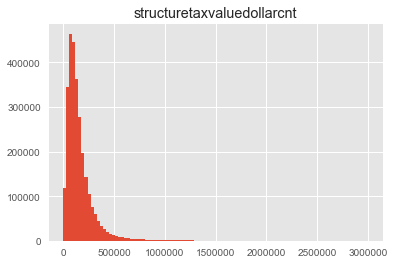

In [16]:
%matplotlib inline
properties.hist('structuretaxvaluedollarcnt',bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1197df610>]], dtype=object)

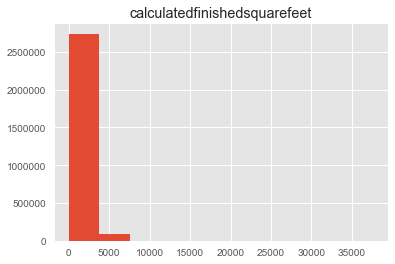

In [17]:
%matplotlib inline
properties.hist('calculatedfinishedsquarefeet',bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x136c33110>]], dtype=object)

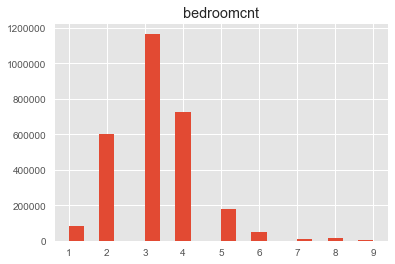

In [18]:
%matplotlib inline
properties.hist('bedroomcnt',bins=20)

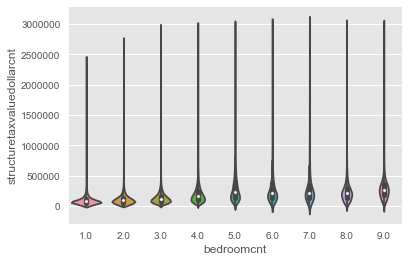

In [19]:
% matplotlib inline
sns.violinplot(x='bedroomcnt', y='structuretaxvaluedollarcnt', data=properties)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1197c5b10>]], dtype=object)

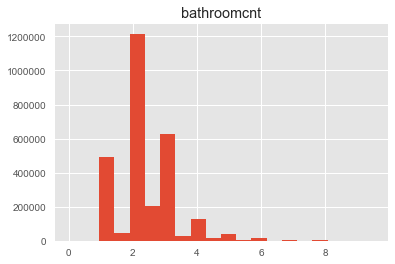

In [20]:
%matplotlib inline
properties.hist('bathroomcnt',bins=20)
#2 bath units are by far the most common

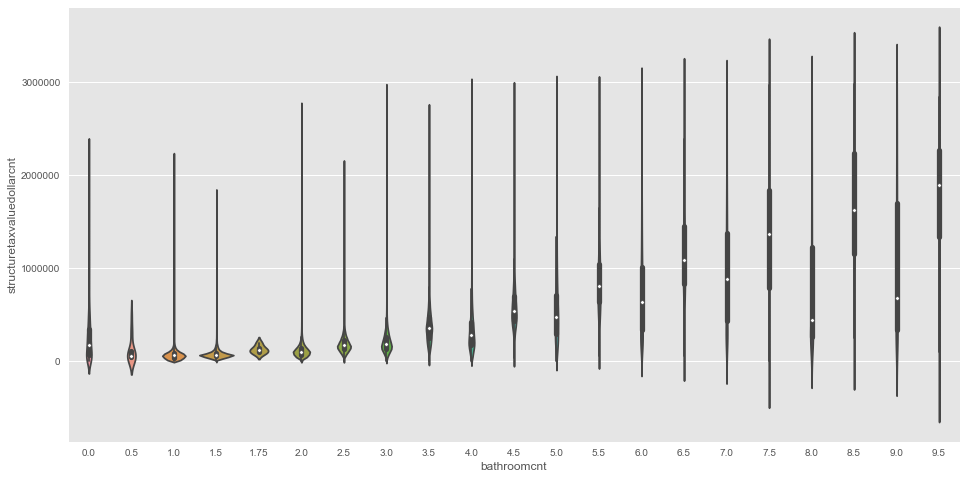

In [21]:
% matplotlib inline
plt.figure(figsize=(16,8))
sns.violinplot(x='bathroomcnt', y='structuretaxvaluedollarcnt', data=properties)

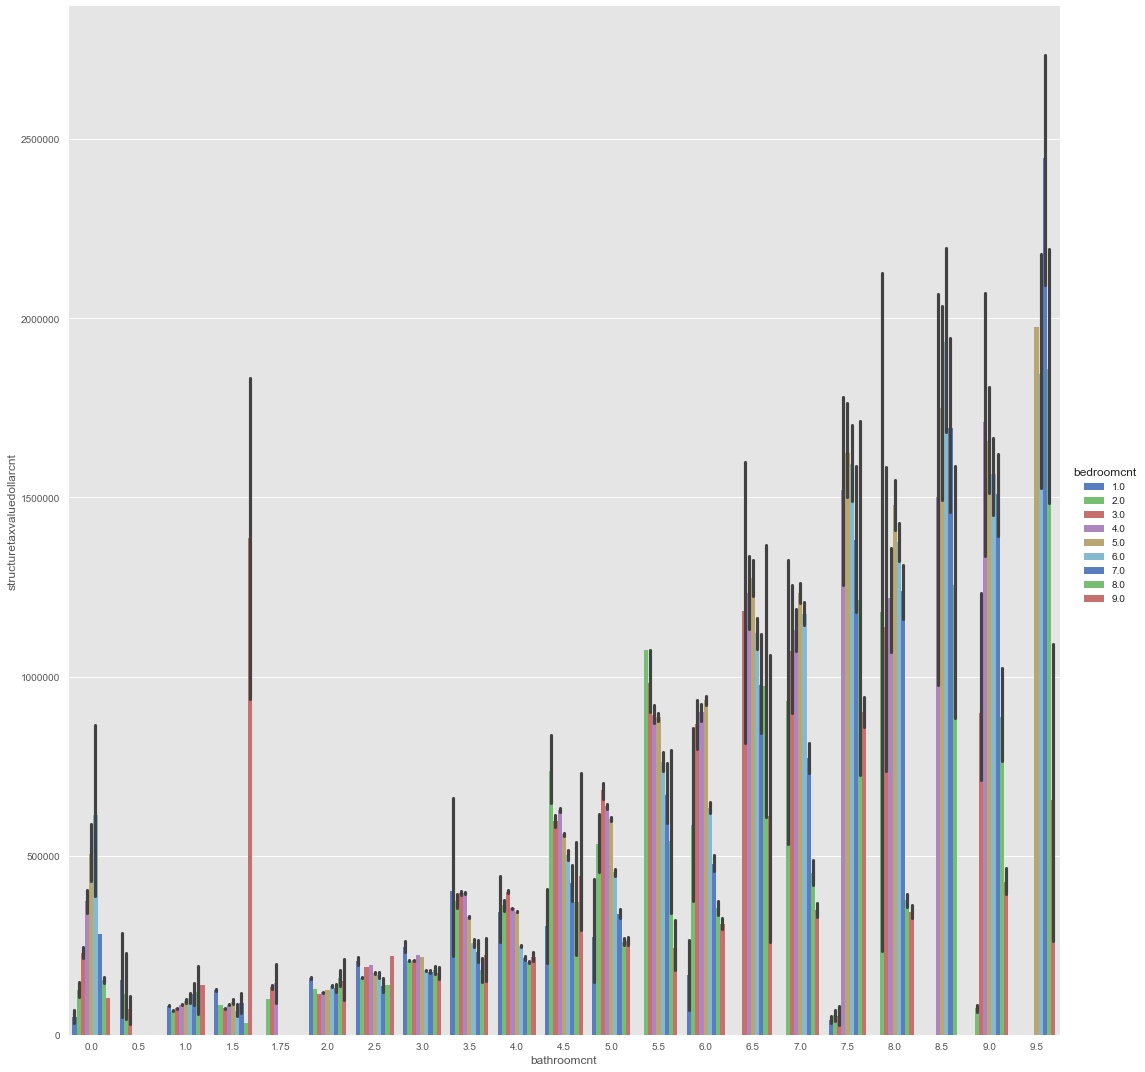

In [22]:
%matplotlib inline
sns.factorplot(x="bathroomcnt", y="structuretaxvaluedollarcnt", hue="bedroomcnt", data=properties, kind="bar",size=15, palette="muted")
#it looks like there isn't a premium to having higher number of bathrooms

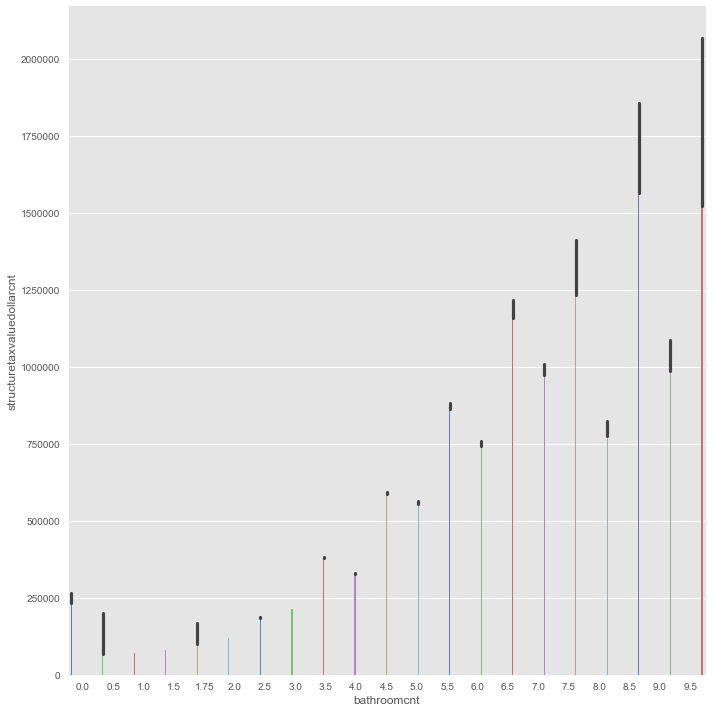

In [23]:
%matplotlib inline
plt.figure(figsize=(16,8))
sns.factorplot(x="bathroomcnt", y="structuretaxvaluedollarcnt", hue="bathroomcnt", data=properties, kind="bar",size=10, palette="muted")

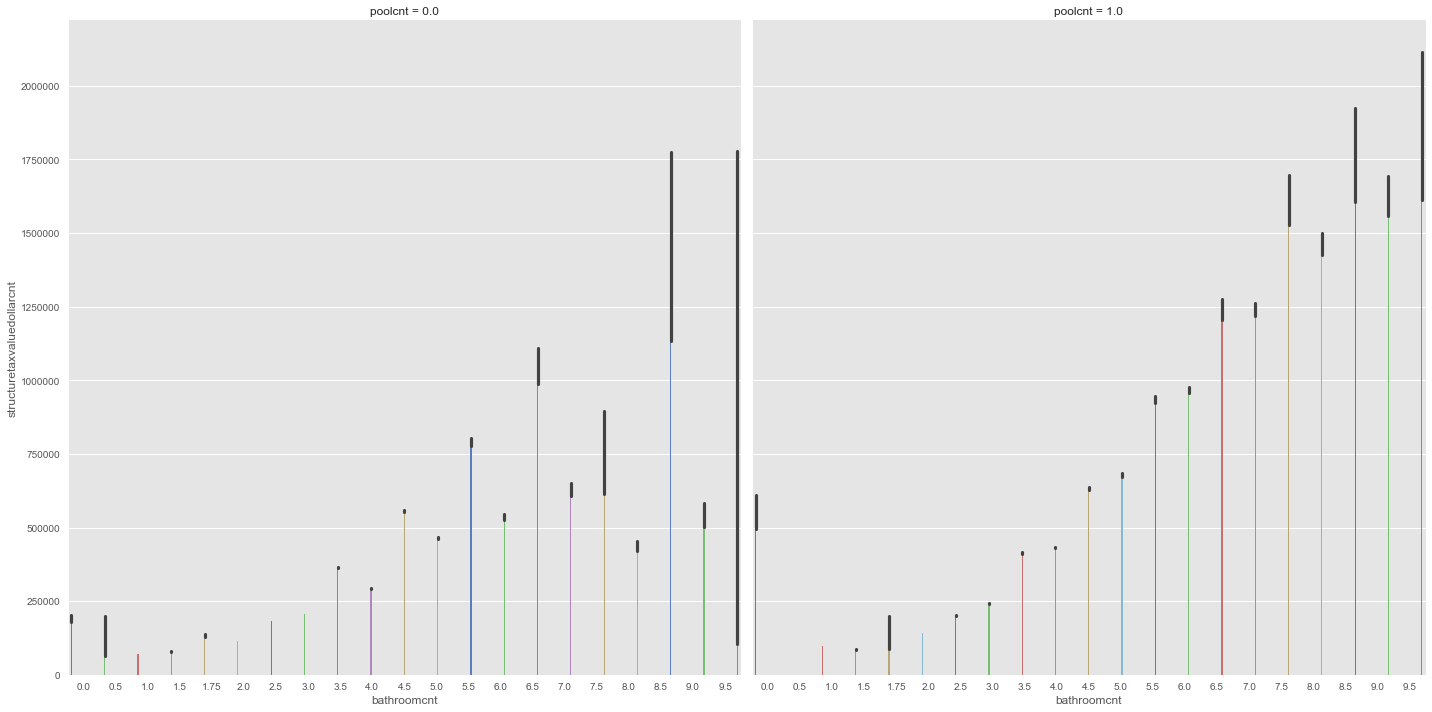

In [24]:
%matplotlib inline
plt.figure(figsize=(16,8))
sns.factorplot(x="bathroomcnt", y="structuretaxvaluedollarcnt", hue="bathroomcnt",col="poolcnt", data=properties, kind="bar",size=10, palette="muted")

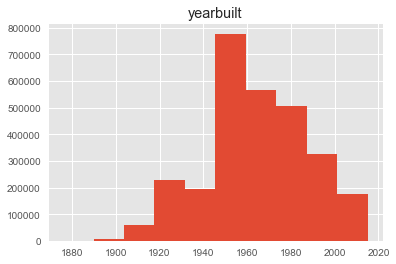

In [25]:
%matplotlib inline
properties.hist('yearbuilt',bins=10)
plt.figure(figsize=(16,16));

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116b4b0d0>]], dtype=object)

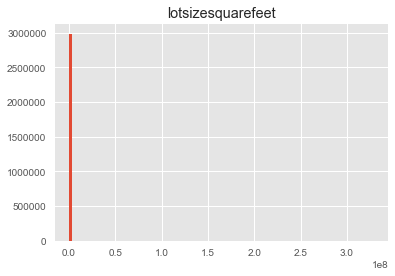

In [27]:
%matplotlib inline
plt.figure(figsize=(16,8))
propertiesorig.hist('lotsizesquarefeet',bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116b3ce90>]], dtype=object)

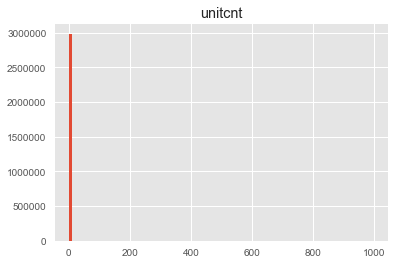

In [28]:
%matplotlib inline
plt.figure(figsize=(16,8))
propertiesorig.hist('unitcnt',bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115f11c50>]], dtype=object)

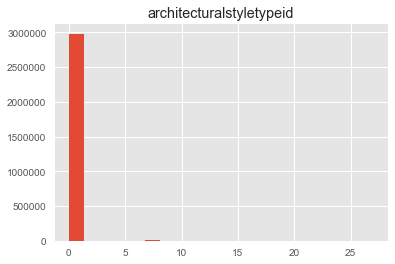

In [29]:
%matplotlib inline
plt.figure(figsize=(16,8))
propertiesorig.hist('architecturalstyletypeid',bins=20)
#A severe majority of architectual styles are type 8

In [30]:
pd.crosstab(index=propertiesorig['heatingorsystemtypeid'], columns="count") 

col_0,count
heatingorsystemtypeid,
0.0,1178816
1.0,262
2.0,1156830
6.0,27480
7.0,595453
10.0,39
11.0,16
12.0,25
13.0,1342


In [31]:
pd.crosstab(index=propertiesorig['propertycountylandusecode'], columns="count") 

col_0,count
propertycountylandusecode,
0,21778
1,3
2,1153896
3,247494
4,111
5,3501
6,13988
7,36
8,2


In [32]:
pd.crosstab(index=propertiesorig['buildingqualitytypeid'], columns="count") 

col_0,count
buildingqualitytypeid,
0.0,1046729
1.0,69467
2.0,2
3.0,6
4.0,692160
5.0,21
6.0,94
7.0,1133238
8.0,51


In [33]:
pd.pivot_table(propertiesorig, values='structuretaxvaluedollarcnt', index=['bathroomcnt'], columns=['bedroomcnt'],aggfunc=np.mean,margins=True)
#it looks like there are some obvious data cleaning issues -- there is a house with 20 bedrooms and 0 bathrooms (and some with 0 bedrooms and 20 bathrooms)

bedroomcnt,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,All
bathroomcnt,,,,,,,,,,,,,,,,,,,,,
0.0,1.460352e+05,4.925794e+04,1.228495e+05,2.270430e+05,3.779823e+05,5.231740e+05,7.046474e+05,2.819380e+05,1.491241e+06,1.020000e+05,...,7.949670e+05,NaN,4.639242e+06,NaN,2.341759e+06,NaN,8707547.0,NaN,2.016350e+06,1.474155e+05
0.5,4.759585e+05,1.522503e+05,1.142654e+05,7.204733e+04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.650081e+05
1.0,1.027951e+05,8.115244e+04,6.764127e+04,7.340742e+04,8.366971e+04,9.341415e+04,1.018556e+05,1.101775e+05,1.184814e+05,1.383210e+05,...,5.359500e+04,2.098000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.224905e+04
1.5,1.653328e+05,1.250735e+05,8.253397e+04,7.368181e+04,8.404539e+04,9.256562e+04,2.173587e+05,8.887667e+04,2.120764e+06,1.386542e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.018260e+04
1.75,NaN,NaN,9.880300e+04,1.335110e+05,1.437525e+05,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.306660e+05
2.0,2.152146e+05,1.589072e+05,1.269401e+05,1.142932e+05,1.180672e+05,1.248009e+05,1.358023e+05,1.295165e+05,1.508272e+05,1.472522e+05,...,1.474507e+05,NaN,2.360940e+05,NaN,NaN,NaN,NaN,NaN,NaN,1.185758e+05
2.5,2.000774e+05,2.059096e+05,1.591386e+05,1.890334e+05,1.943724e+05,1.730917e+05,1.674442e+05,1.370836e+05,1.391870e+05,2.186880e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.863710e+05
3.0,2.015755e+05,2.553944e+05,2.072488e+05,2.075328e+05,2.230587e+05,2.168056e+05,1.792928e+05,1.743476e+05,1.780529e+05,1.680948e+05,...,1.958540e+05,1.077400e+05,2.151203e+05,4.159000e+04,NaN,NaN,NaN,NaN,NaN,2.143052e+05
3.5,4.186317e+05,4.017772e+05,3.744028e+05,3.957658e+05,3.965920e+05,3.285656e+05,2.560664e+05,2.305314e+05,1.817562e+05,2.240713e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.800646e+05


In [32]:
plt.figure(figsize=(16,8))
bed_bath_price_plot = sns.factorplot(x="bathroomcnt", y="structuretaxvaluedollarcnt", hue="bedroomcnt",col="bedroomcnt", data=properties, kind="bar",size=10, palette="muted",col_wrap=4)
bed_bath_price_plot.savefig("bed_bath_price_plot.png")

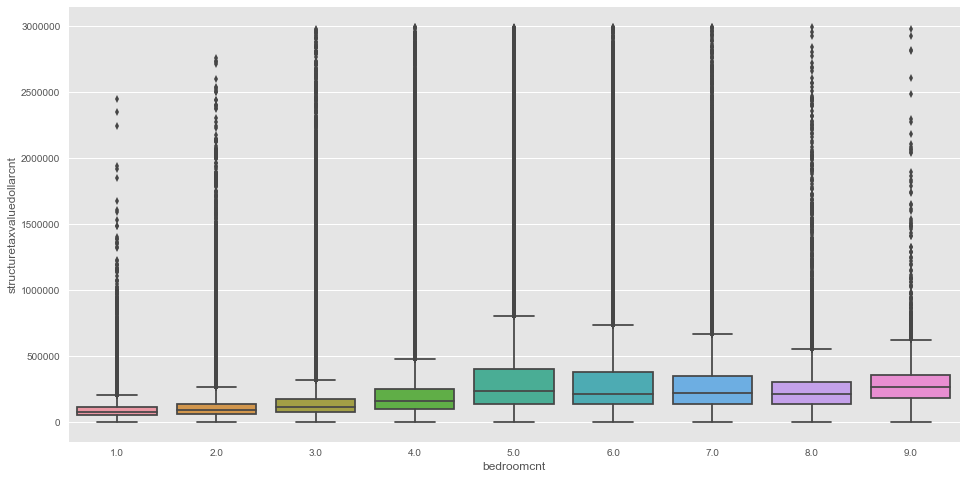

In [34]:
plt.figure(figsize=(16,8))
sns.boxplot(x='bedroomcnt',y='structuretaxvaluedollarcnt',data=properties)
sns.despine()
#it looks like there is a significant move in the average value once 5 beds are hit -- could be something to create a feature out of
#it also looks like there is a high IQR for 0 bedroom units - may be location based -- could be something to create a location out of based on geo...

/anaconda/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


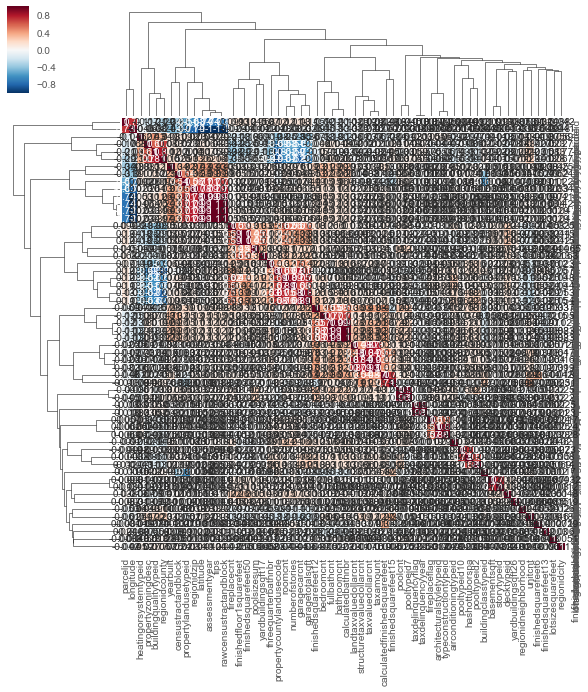

In [35]:
%matplotlib inline
#Since some of the variables are the sum of others there is cause to remove some of them
plt.figure(figsize=(30,30))
sns.clustermap(propertiesorig.corr(), annot=True,annot_kws={'size': 10});

In [36]:
#sns.pairplot(properties, diag_kind='kde', kind='reg', diag_kws=dict(shade=True));

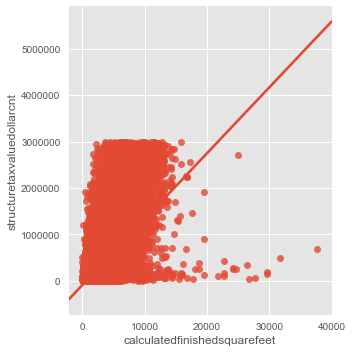

In [37]:
plt.figure(figsize=(16,8))
sns.lmplot('calculatedfinishedsquarefeet', 'structuretaxvaluedollarcnt', properties);

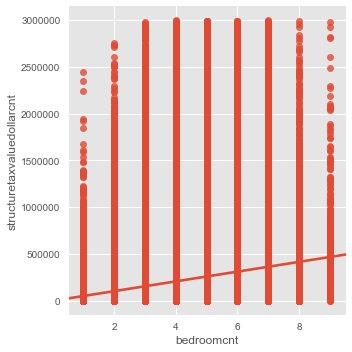

In [38]:
plt.figure(figsize=(16,8))
sns.lmplot('bedroomcnt', 'structuretaxvaluedollarcnt', properties);

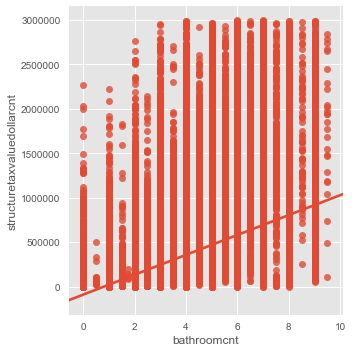

In [39]:
plt.figure(figsize=(16,8))
sns.lmplot('bathroomcnt', 'structuretaxvaluedollarcnt', properties);

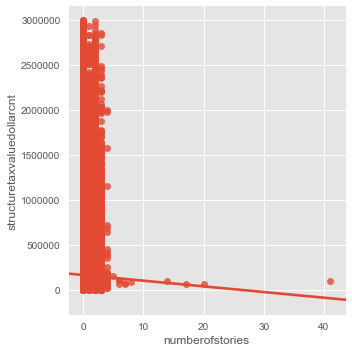

In [40]:
plt.figure(figsize=(16,8))
sns.lmplot('numberofstories', 'structuretaxvaluedollarcnt', properties);

In [9]:
X = properties.drop(['structuretaxvaluedollarcnt','parcelid'],axis=1)
y = properties['structuretaxvaluedollarcnt']

/anaconda/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


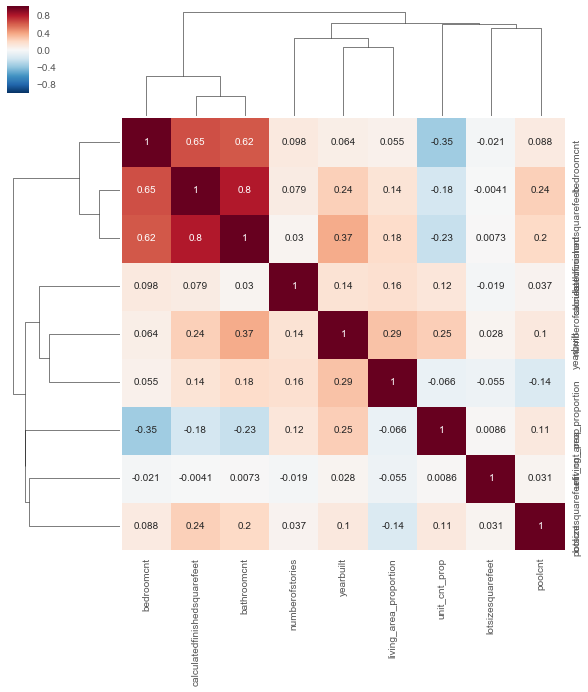

In [40]:
%matplotlib inline
#Once we have subset, we know we have eliminated multi-collinearity as much as possible
plt.figure(figsize=(16,8))
clustermap = sns.clustermap(X.corr(), annot=True,annot_kws={'size': 10});
clustermap.savefig("clustermap.png")

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
y_log = np.log(y)

In [36]:
bedbathcols = ['structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt']
properties_key = properties[bedbathcols]
properties_key['structure_log'] = np.log(properties_key.structuretaxvaluedollarcnt)

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


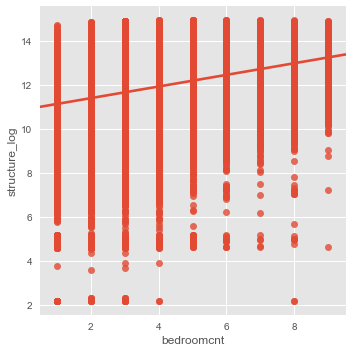

In [43]:
%matplotlib inline
plt.figure(figsize=(16,8))
sns.lmplot('bedroomcnt', 'structure_log', properties_key);

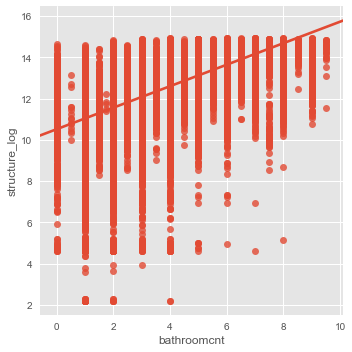

In [44]:
%matplotlib inline
plt.figure(figsize=(16,8))
sns.lmplot('bathroomcnt', 'structure_log', properties_key);

In [37]:
properties_key.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2839415 entries, 0 to 2839414
Data columns (total 4 columns):
structuretaxvaluedollarcnt    float64
bedroomcnt                    float64
bathroomcnt                   float64
structure_log                 float64
dtypes: float64(4)
memory usage: 86.7 MB


In [41]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

In [11]:
X_train_50K = X_train.iloc[:50000]
y_train_50K = y_train.iloc[:50000]


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn import feature_selection

lm_mae = LinearRegression()

lm_mae.fit(X,y)
lm_mae_y = lm_mae.predict(X)
print "Mean squared error of LM Scored on MAE: ", mean_squared_error(y, lm_mae_y)
print "Mean absolute error of LM Scored on MAE: ", mean_absolute_error(y, lm_mae_y)
print "coefficients:", lm_mae.coef_
print "intercept:", lm_mae.intercept_
print "r2:", lm_mae.score(X,y)
lm_mae = cross_val_score(estimator=lm_mae,X=X, y=y, cv=10, scoring='neg_mean_absolute_error')
lm_mae

Mean squared error of LM Scored on MAE:  10945054768.5
Mean absolute error of LM Scored on MAE:  59844.9513727
coefficients: [  1.45e+02  -3.25e+04   2.30e+04   9.21e+02  -3.83e-04  -2.57e+04
   1.49e+04   1.08e+05   1.28e+03]
intercept: -1949733.05617
r2: 0.625728491204


array([-59948.83, -59965.56, -59916.11, -59826.42, -59906.28, -59815.71,
       -59703.03, -59851.64, -59853.87, -59665.03])

In [44]:
properties.mean(axis=0)
#so we could say that our % error is 68411.5728356/1.689703e+05
68411.5728356/1.689703e+05
#so our mean absolute error is 40% of the mean house value..

0.40

In [45]:
from sklearn.linear_model import Ridge

alphas = np.logspace(-2, 3, 100)
model = Ridge()

score, coefs = {}, {}
for a in alphas:
    model.set_params(alpha=a)
    mse = -cross_val_score(estimator=model, 
                         X=X, y=y, cv=5, scoring='neg_mean_squared_error')
    score[a] = [np.mean(mse), np.std(mse)]
    model.fit(X, y)
    coefs[a] = model.coef_
ridge_y = model.predict(X)
print "Mean squared error of Ridge LM", mean_squared_error(y, ridge_y)
print "Mean absolute error of Ridge LM", mean_absolute_error(y, ridge_y)
print "coefficients:", model.coef_
print "intercept:", model.intercept_
print "r2:", model.score(X,y)

Mean squared error of Ridge LM 10945152826.4
Mean absolute error of Ridge LM 59830.5823586
coefficients: [  1.45e+02  -3.26e+04   2.29e+04   9.27e+02  -3.94e-04  -2.56e+04
   1.50e+04   1.05e+05   1.10e+03]
intercept: -1958093.96338
r2: 0.625725138064


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn import feature_selection

lm_log_mae = LinearRegression()

lm_log_mae.fit(X,y_log)
lm_log_mae_y = lm_log_mae.predict(X)
print "Mean squared error of LM y-logged Scored on MAE: ", mean_squared_error(y_log, lm_log_mae_y)
print "Mean absolute error of LM y-logged Scored on MAE: ", mean_absolute_error(y_log, lm_log_mae_y)
print "coefficients:", lm_log_mae.coef_
print "intercept:", lm_log_mae.intercept_
print "r2:", lm_log_mae.score(X,y_log)
lm_log_mae = cross_val_score(estimator=lm_log_mae,X=X, y=y_log, cv=10, scoring='neg_mean_squared_error')
lm_log_mae

Mean squared error of LM y-logged Scored on MAE:  0.276921788717
Mean absolute error of LM y-logged Scored on MAE:  0.382567837995
coefficients: [  4.03e-04  -3.54e-02   1.61e-01   9.79e-03  -2.77e-09  -9.71e-02
   1.43e-01   3.44e-01   4.69e-02]
intercept: -8.83550316772
r2: 0.559583437531


array([-0.28, -0.28, -0.28, -0.28, -0.28, -0.28, -0.27, -0.28, -0.28, -0.28])

In [47]:
#with log y

alphas = np.logspace(-2, 3, 100)
model = Ridge()

score, coefs = {}, {}
for a in alphas:
    model.set_params(alpha=a)
    mse = -cross_val_score(estimator=model, 
                         X=X, y=y_log, cv=10, scoring='neg_mean_squared_error')
    score[a] = [np.mean(mse), np.std(mse)]
    model.fit(X, y_log)
    coefs[a] = model.coef_

ridge_y_log = model.predict(X)
print "Mean squared error of Ridge LM", mean_squared_error(y_log, ridge_y_log)
print "Mean absolute error of Ridge LM", mean_absolute_error(y_log, ridge_y_log)
print "coefficients:", model.coef_
print "intercept:", model.intercept_
print "r2:", model.score(X,y_log)

Mean squared error of Ridge LM 0.276922856527
Mean absolute error of Ridge LM 0.382545960674
coefficients: [  4.03e-04  -3.57e-02   1.61e-01   9.81e-03  -2.81e-09  -9.68e-02
   1.43e-01   3.36e-01   4.60e-02]
intercept: -8.86551071647
r2: 0.559581739286


In [48]:
#Train Test Split with previously run lm on whole properties data set

lm_mae = LinearRegression()

lm_mae.fit(X_train,y_train)
lm_mae_y = lm_mae.predict(X_train)
print "Mean squared error of LM Scored on MAE: ", mean_squared_error(y_train, lm_mae_y)
print "Mean absolute error of LM Scored on MAE: ", mean_absolute_error(y_train, lm_mae_y)
print "coefficients:", lm_mae.coef_
print "intercept:", lm_mae.intercept_
print "r2:", lm_mae.score(X_train,y_train)
print "test r2:", lm_mae.score(X_test,y_test)
lm_mae = cross_val_score(estimator=lm_mae,X=X_train, y=y_train, cv=10, scoring='neg_mean_squared_error')
lm_mae
print feature_selection.f_regression(X_train, y_train)

Mean squared error of LM Scored on MAE:  10932189469.8
Mean absolute error of LM Scored on MAE:  59826.9864237
coefficients: [  1.45e+02  -3.25e+04   2.27e+04   9.28e+02  -1.25e-04  -2.56e+04
   1.50e+04   1.07e+05   1.39e+03]
intercept: -1962102.30905
r2: 0.626345776899
test r2: 0.624467608317
(array([  2.28e+06,   2.36e+05,   1.27e+06,   2.73e+05,   1.21e+02,
         1.04e+03,   1.19e+05,   8.34e+02,   3.14e+04]), array([  0.00e+000,   0.00e+000,   0.00e+000,   0.00e+000,   4.73e-028,
         7.99e-228,   0.00e+000,   2.01e-183,   0.00e+000]))


In [49]:
#Train Test Split with previously run ridge lm on whole properties data set

alphas = np.logspace(-2, 3, 100)
model = Ridge()

score, coefs = {}, {}
for a in alphas:
    model.set_params(alpha=a)
    mae = -cross_val_score(estimator=model, 
                         X=X_train, y=y_train, cv=5, scoring='neg_mean_absolute_error')
    score[a] = [np.mean(mae), np.std(mae)]
    model.fit(X_train, y_train)
    coefs[a] = model.coef_

ridge_y_train = model.predict(X_train)
print "Mean squared error of Ridge LM", mean_squared_error(y_train, ridge_y_train)
print "Mean absolute error of Ridge LM", mean_absolute_error(y_train, ridge_y_train)
print "coefficients:", model.coef_
print "intercept:", model.intercept_
print "r2:", model.score(X_train,y_train)
print "test r2:", model.score(X_test,y_test)

Mean squared error of Ridge LM 10932400468.8
Mean absolute error of Ridge LM 59806.2139679
coefficients: [  1.45e+02  -3.27e+04   2.25e+04   9.36e+02  -1.36e-04  -2.55e+04
   1.51e+04   1.03e+05   1.12e+03]
intercept: -1974356.49414
r2: 0.626338565106
test r2: 0.624452040462


In [50]:
#with log y

lm = LinearRegression()

lm.fit(X_train,y_train_log)
lm_y_train = lm.predict(X_train)
print "Mean squared error of Ridge LM", mean_squared_error(y_train_log, lm_y_train)
print "Mean absolute error of Ridge LM", mean_absolute_error(y_train_log, lm_y_train)
print "coefficients:", lm.coef_
print "intercept:", lm.intercept_
print "r2:", lm.score(X_train,y_train_log)
print "test r2:", lm.score(X_test,y_test_log)
lm_mse = cross_val_score(estimator=lm,X=X_train, y=y_train_log, cv=10, scoring='neg_mean_squared_error')
lm_mse

print feature_selection.f_regression(X_train, y_train_log)

Mean squared error of Ridge LM 0.276869651377
Mean absolute error of Ridge LM 0.382479258862
coefficients: [  4.03e-04  -3.52e-02   1.61e-01   9.81e-03  -1.89e-09  -9.66e-02
   1.42e-01   3.43e-01   4.65e-02]
intercept: -8.87842473755
r2: 0.559751038583
test r2: 0.559238254016
(array([  1.38e+06,   2.88e+05,   1.29e+06,   5.77e+05,   1.69e+02,
         2.63e+02,   1.22e+05,   7.70e+02,   5.51e+04]), array([  0.00e+000,   0.00e+000,   0.00e+000,   0.00e+000,   1.18e-038,
         3.73e-059,   0.00e+000,   1.57e-169,   0.00e+000]))


In [51]:
#with log y

alphas = np.logspace(-2, 3, 100)
model = Ridge()

score, coefs = {}, {}
for a in alphas:
    model.set_params(alpha=a)
    mse = -cross_val_score(estimator=model, 
                         X=X_train, y=y_train_log, cv=10, scoring='neg_mean_squared_error')
    score[a] = [np.mean(mse), np.std(mse)]
    model.fit(X_train, y_train_log)
    coefs[a] = model.coef_

ridge_y2_train = model.predict(X_train)    
ridge_y2_test = model.predict(X_test)    
print "Mean absolute error of Ridge LM", mean_absolute_error(y_train_log, ridge_y2_train)
print "Mean absolute error of Ridge LM", mean_absolute_error(y_test_log, ridge_y2_test)
print "coefficients:", model.coef_
print "intercept:", model.intercept_
print "r2:", model.score(X_train,y_train_log)
#print "alpha", model.alpha_
print "test r2:",model.score(X_test,y_test_log)

Mean absolute error of Ridge LM 0.382447154869
Mean absolute error of Ridge LM 0.382852616811
coefficients: [  4.03e-04  -3.56e-02   1.60e-01   9.84e-03  -1.93e-09  -9.62e-02
   1.42e-01   3.30e-01   4.52e-02]
intercept: -8.92250211659
r2: 0.559747373265
test r2: 0.55923035603


In [52]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import scale
alphas = np.linspace(0.0000001, 1, 100)
model = RidgeCV(cv=5, alphas=alphas).fit(X=scale(X_train), y=scale(y_train_log))

In [53]:
mse_path = np.mean(model.mse_path, axis=1)
plt.figure(figsize=(10,5))
plt.plot(model.alphas_, mse_path);

AttributeError: 'RidgeCV' object has no attribute 'mse_path'

In [55]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn import feature_selection
#fit model
lm = smf.ols(formula='structuretaxvaluedollarcnt ~ calculatedfinishedsquarefeet + bedroomcnt + bathroomcnt + yearbuilt +lotsizesquarefeet + unit_cnt_prop +living_area_proportion + numberofstories + poolcnt', data=properties).fit()
#print summary 
lm.summary()
#make prediction
sm_ols_y = lm.predict(X)
print "Mean absolute error: ", mean_absolute_error(y, sm_ols_y)
print "Mean squared error: ", mean_squared_error(y, sm_ols_y)
lm.summary()

Mean absolute error:  59844.9513727
Mean squared error:  10945054768.5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     structuretaxvaluedollarcnt   R-squared:                       0.626
Model:                                    OLS   Adj. R-squared:                  0.626
Method:                         Least Squares   F-statistic:                 5.275e+05
Date:                        Wed, 04 Oct 2017   Prob (F-statistic):               0.00
Time:                                11:46:26   Log-Likelihood:            -3.6847e+07
No. Observations:                     2839415   AIC:                         7.369e+07
Df Residuals:                         2839405   BIC:                         7.369e+07
Df Model:                                   9                                         
Covariance Type:                    nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     -1.95e+06   6163.078   -316.357      0.000   -1.96e+06   -1.94e+06
calculatedfinishedsquarefeet   144.7167      0.125   1153.508      0.000     144.471     144.963
bedroomcnt                   -3.255e+04     82.060   -396.641      0.000   -3.27e+04   -3.24e+04
bathroomcnt                   2.302e+04    120.071    191.746      0.000    2.28e+04    2.33e+04
yearbuilt                      921.0516      3.250    283.403      0.000     914.682     927.421
lotsizesquarefeet               -0.0004      0.000     -2.020      0.043      -0.001   -1.13e-05
unit_cnt_prop                 1.078e+05    523.136    206.095      0.000    1.07e+05    1.09e+05
living_area_proportion        1284.5719    252.826      5.081      0.000     789.042    1780.102
numberofstories              -2.565e+04    100.327   -255.685      0.000   -2.58e+04   -2.55e+04
poolcnt                       1.494e+04    172.011     86.844      0.000    1.46e+04    1.53e+04
==============================================================================
Omnibus:                  2729238.920   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        532620028.755
Skew:                           4.177   Prob(JB):                         0.00
Kurtosis:                      69.575   Cond. No.                     3.27e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.externals.six import StringIO
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import pydot # python interface to graphviz dot language https://github.com/erocarrera/pydot
from os import system
from IPython.display import Image # to display graphviz image in notebook
from sklearn import tree

Decision_model = DecisionTreeClassifier(max_depth=4,min_samples_leaf=500)
Decision_model.fit(X_train_50K.values, y_train_50K.values)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=500,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [45]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(Decision_model, X.values, y.values, cv=10)

KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
plt.axis([0, 2000000, 0, 500000])
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [1]:
decision_tree_y = Decision_model.predict(X_train.values)

NameError: name 'Decision_model' is not defined

In [ ]:
print "Decision Tree MAE: ", mean_absolute_error(y_train, decision_tree_y)
decision_tree_y_test = Decision_model.predict(X_test)
print "Decision Tree MAE: ", mean_absolute_error(y_ttest, decision_tree_y_test)
tree.export_graphviz(Decision_model)

In [ ]:
def show_tree(model):
    """Displays graphviz figure in notebook"""
    dot_data = StringIO()
    export_graphviz(model, 
                    out_file = dot_data, 
                    feature_names = X.columns, 
                    filled=True, 
                    rounded=True)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return Image(graph[0].create_png())


def save_tree_image(model):
    """Saves graphviz figure in working directory"""    
    dotfile = open("tree.dot", 'w')
    export_graphviz(model,
                    out_file = dotfile,
                    feature_names = X.columns)

    dotfile.close()
    system("dot -Tpng tree.dot -o tree.png")
    
show_tree(model)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=5)
model.fit(X_train_50K, y_train_50K)

In [ ]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(model, X_train_50K, y_train_50K, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

auc_scores = {}
for n_trees in range(1, 100, 10):
    model = RandomForestClassifier(n_estimators = n_trees,max_features=10)
    scores = cross_val_score(model, X_train, y_train, scoring='roc_auc')
    print('n trees: {}, CV AUC {}, Average AUC {}'.format(n_trees, scores, scores.mean()))
    auc_scores[n_trees] = scores.mean()
pd.Series(auc_scores, name='AUC Scores').plot();

In [ ]:
features = X_train.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df

In [54]:
# pip install keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD   # Stochastic Gradient Descent

In [55]:
# Define a model
model = Sequential()

# First layer - input_dim=k features.
model.add(Dense(input_dim=9, output_dim=6))
model.add(Dense(input_dim=6, output_dim=1))
model.add(Activation("linear"))

# Uses Mean Squared Error and Stochastic Gradient Descent
model.compile(loss='mae', optimizer=SGD(lr=0.2))

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=6, input_dim=9)`
  """
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, input_dim=6)`
  


In [57]:
# Train the model
print('Training...')
loss = model.fit(X_train.values, y_train.values, 
                 validation_split=0.2, nb_epoch=25, 
                 batch_size=32, verbose=True)
print(loss.history['loss'][-1])   # displays MSE at last iteration
print("Training complete")

Training...
Train on 1521926 samples, validate on 380482 samples
Epoch 1/25
1521926/1521926 [==============================] - 107s - loss: nan - val_loss: nan
Epoch 2/25
1521926/1521926 [==============================] - 109s - loss: nan - val_loss: nan
Epoch 3/25
1521926/1521926 [==============================] - 110s - loss: nan - val_loss: nan
Epoch 4/25
1521926/1521926 [==============================] - 111s - loss: nan - val_loss: nan
Epoch 5/25
1521926/1521926 [==============================] - 111s - loss: nan - val_loss: nan
Epoch 6/25
1521926/1521926 [==============================] - 103s - loss: nan - val_loss: nan
Epoch 7/25
1521926/1521926 [==============================] - 109s - loss: nan - val_loss: nan
Epoch 8/25
1521926/1521926 [==============================] - 111s - loss: nan - val_loss: nan
Epoch 9/25
1521926/1521926 [==============================] - 111s - loss: nan - val_loss: nan
Epoch 10/25
1521926/1521926 [==============================] - 110s - loss: nan 

In [58]:
#loads model that had been fit in other notebook
model.save('I14_Linear_SGD_LR0.1_E25_BS32.h5') 

In [69]:
y

0          218982.0
1          267623.0
2          229399.0
3          334432.0
4          207035.0
5          746203.0
6          122915.0
7          338167.0
8          363000.0
9          106418.0
10          76253.0
11         116069.0
12         261678.0
13         389232.0
14         471722.0
15         402045.0
16         396726.0
17         272537.0
18         264704.0
19         263726.0
20         339180.0
21         253162.0
22         364474.0
23         226249.0
24         561837.0
25          22771.0
26          61072.0
27         183944.0
28          48300.0
29         768000.0
             ...   
2839385    409940.0
2839386    316193.0
2839387    550789.0
2839388    501524.0
2839389    383000.0
2839390    201752.0
2839391     88723.0
2839392    237048.0
2839393    463704.0
2839394    225024.0
2839395    295463.0
2839396    233697.0
2839397    437765.0
2839398    249035.0
2839399    123548.0
2839400    326900.0
2839401    600000.0
2839402    366000.0
2839403     89403.0


In [70]:
#y[y == inf] = 1, below error not due to inf

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
# Model evaluation
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

pred_y = model.predict(X.values, verbose=False)
preds  = model.predict_classes(X.values, verbose=False)
dl_y = model.predict(X.values)

print "Mean absolute error: ", mean_absolute_error(y, dl_y)
print('ACCURACY: ', accuracy_score(y, preds))
print('CONFUSION MATRIX:\n', confusion_matrix(y, preds))

# Plot the error over time

plt.scatter(range(len(loss.history['loss'])), loss.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE by Epoch');

Mean absolute error: 

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
# Define a model
model = Sequential()

# First layer - input_dim=k features.
model.add(Dense(input_dim=10, output_dim=6))
model.add(Dense(input_dim=6, output_dim=1))
model.add(Activation("relu"))

# Uses Mean Squared Error and Stochastic Gradient Descent
model.compile(loss='mse', optimizer='adam')

In [ ]:
# Train the model
print('Training...')
loss = model.fit(X_train.values, y_train.values, 
                 validation_split=0.2, nb_epoch=50, 
                 batch_size=64, verbose=True)
print(loss.history['loss'][-1])   # displays MSE at last iteration
print("Training complete")

In [ ]:
model.load('I14_Relu_ADAM_LR0.25_E50_BS64_cutCorr.h5')

In [ ]:
# Model evaluation
pred_y = model.predict(X, verbose=False)
preds  = model.predict_classes(X, verbose=False)

print('ACCURACY: ', accuracy_score(y, preds))
print('CONFUSION MATRIX:\n', confusion_matrix(y, preds))

# Plot the error over time

plt.scatter(range(len(loss.history['loss'])), loss.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE by Epoch');